Aina Lluis Huelmo, Estadística Aplicada

# CODI DE PROGRAMACIÓ TFG

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("dades.csv")

In [3]:
print("Dimensions del data set:", data.shape)

Dimensions del data set: (25976, 25)


In [4]:
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


**ELIMINACIÓ DE VARIABLES**

Ara podem treure la primera i la segona columna de la base de dades ja que no són útil per a l'estudi que volem fer:

In [5]:
data=data.drop(["Unnamed: 0","id"],axis=1)
data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


**VALORS FALTANTS**

In [6]:
valors_faltants_per_variable = data.isna().sum()

print("Número de valors faltants per cada variable:")
print(valors_faltants_per_variable)

Número de valors faltants per cada variable:
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64


En aquest cas podem veure que la variable que té valors faltants és la que ens indica els minuts de retràs en l'arribada del vol: Arrival Delay in Minutes. En aquesta variable haurem d'aplicar algún mètode d'imputació per tal de no tenir valors faltants. 

Farem imputació múltiple per aquesta variable i per tant hem de crear un model per predir els valors d'aquesta i substituir els valors faltants per la predicció que obtinguem.

I ara ja podem fer el model per imputar les dades:

IMPUTACIÓ

In [7]:
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

selected_features = data.columns.tolist()
selected_features.remove('satisfaction')

numeric_vars = data[selected_features].select_dtypes(include=['int64', 'float64']).columns
categorical_vars = data[selected_features].select_dtypes(include=['object', 'category']).columns

preprocessor_selected = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_vars)
    ],
    remainder='passthrough'  
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_selected),
    ('imputer', IterativeImputer(random_state=410))
])

data_processed = pipeline.fit_transform(data[selected_features])

dades = pd.DataFrame(
    data_processed,
    columns=pipeline.named_steps['preprocessor'].get_feature_names_out(),
    index=data.index
)

dades['satisfaction'] = data['satisfaction']
print(dades.isnull().sum())

cat__Gender_Female                              0
cat__Gender_Male                                0
cat__Customer Type_Loyal Customer               0
cat__Customer Type_disloyal Customer            0
cat__Type of Travel_Business travel             0
cat__Type of Travel_Personal Travel             0
cat__Class_Business                             0
cat__Class_Eco                                  0
cat__Class_Eco Plus                             0
remainder__Age                                  0
remainder__Flight Distance                      0
remainder__Inflight wifi service                0
remainder__Departure/Arrival time convenient    0
remainder__Ease of Online booking               0
remainder__Gate location                        0
remainder__Food and drink                       0
remainder__Online boarding                      0
remainder__Seat comfort                         0
remainder__Inflight entertainment               0
remainder__On-board service                     0


## ANÀLISI DESCRIPTIVA:

In [8]:
data.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

In [9]:
data.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000
mean,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857
std,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539
min,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


**-Age:** representa l'edat dels passatgers, amb un rang que va desde 7 fins a 85 anys. La mitjana d'edat és d'aproximadament 39.62 anys, amb una desviació estàndard aproximadament de 15.13, el que indica una certa variabilitat en les edats. Si féssim un anàlisi d'aquesta variable podriem veure com varia la satisfacció dels clients segons l'edat del passatger. 

**-Flight Distance:** representa la distància de vol per a cada passatger, que varia desde 31 milles fins a 4983 milles. La distància mitjana és aproximadament 1193.79 milles, amb una desviació estàndard aproximada de 998.68, cosa que indica una gran varietat en aquesta variable. Per tant, això ens podria fer pensar que aquesta variable té influència en la satisfacció dels clients. 

**-Inflight wifi service, Departure/Arrival time convenient, Ease of Online booking,etc:** aquestes columnes representen el grau de satisfacció en els diferents aspectes del servei de l'aerolínia. Cada una te una puntuació que varia del 0 al 5. Amb aquesta informació podriem saber quins aspectes del servei estan més relacionats amb la satisfacció dels passatger i com es distribueixen aquestes qualificacions

**- Departure Delay in minutes:** ens indica la quantitat de minuts de retras en la hora de sortida, amb un valor mínim de 0 minuts i un valor màxim de 1128 minuts. Tal i com podem veure, el tercer quantil es troba en 12 minuts de retard, per tant, la majoria d'aquestes dades pertanyen a un vol amb pocs minuts de retard. Amb l'anàlisi d'aquesta podriem veure com afecten els retrassos en la satisfacció dels clients. 

**- Arrival Delay in minutes:** és similar a la variable anterior però aquesta es refereix als minuts de retard en l'hora d'arribada del vol. La mediana és de 0 minuts, el que ens diu que almenys la meitat dels vols d'aquesta base de dades van arribar a temps. El màxim és de 1115 minuts, cosa que ens fa pensar que hi ha vols amb retrassos significatius. Igual que hem comentat en l'anterior, això ens pot ajudar a veure l'impacte de la puntualitat en la satisfacció dels passatgers. 

In [10]:
categorical_variables = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

for variable in categorical_variables:
    category_counts = data[variable].value_counts()
    print(f"Categorías en {variable}:")
    print(category_counts)
    print()

Categorías en Gender:
Gender
Female    13172
Male      12804
Name: count, dtype: int64

Categorías en Customer Type:
Customer Type
Loyal Customer       21177
disloyal Customer     4799
Name: count, dtype: int64

Categorías en Type of Travel:
Type of Travel
Business travel    18038
Personal Travel     7938
Name: count, dtype: int64

Categorías en Class:
Class
Business    12495
Eco         11564
Eco Plus     1917
Name: count, dtype: int64

Categorías en satisfaction:
satisfaction
neutral or dissatisfied    14573
satisfied                  11403
Name: count, dtype: int64



**Gender:** podem observar que les dues categories possibles son "Female" i "Male". El resultat ens mostra que hi ha 13172 passatgers de gènere femení i 12804 passatgers de gènere masculi en la nostra base de dades. Això ens proporciona una visió de la distribució de gènere en el conjunt de dades. 

**Customer Type (Tipus de Client):** en aquesta variable es distingeixen també dues categories "Loyal Customer" y "disloyal Customer". Podem veure que hi ha 21177 clients leals i 4799 clients desleals en el data set. Això ens dona informació per entendre la lleialtat dels clients.

**Type of Travel (Tipus de Viaje):** podem diferenciar també dues categories: "Business travel" i "Personal Travel". L'ànalisi mostra que hiha 18038 passatgers que viatjaven per negocis i 7938 que viatjaven per oci o motius personals.

**Class:** per la variable "Class," trobem tres categories: "Business", "Eco" i "Eco Plus." En aquest cas podem veure que 12495 son de classe bussiness, 11564 de classe econòmica (eco) i 1917 de classe econòmica premium (Eco Plus).

**Satisfaction (Satisfacció):** La variable Satisfaction consta de dues categories possibles: "neutral or dissatisfied" i "satisfied". Podem veure que hi ha 14573 passatgers en la categoria de neutral o insatisfet mentre que hih a 11403 clients que han estat satisfets. 

In [11]:
numeric_vars = data.select_dtypes(include=['int64', 'float64']).columns
categorical_vars = data.select_dtypes(include=['object']).columns

In [12]:
column_names = data.columns

print(column_names)

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')


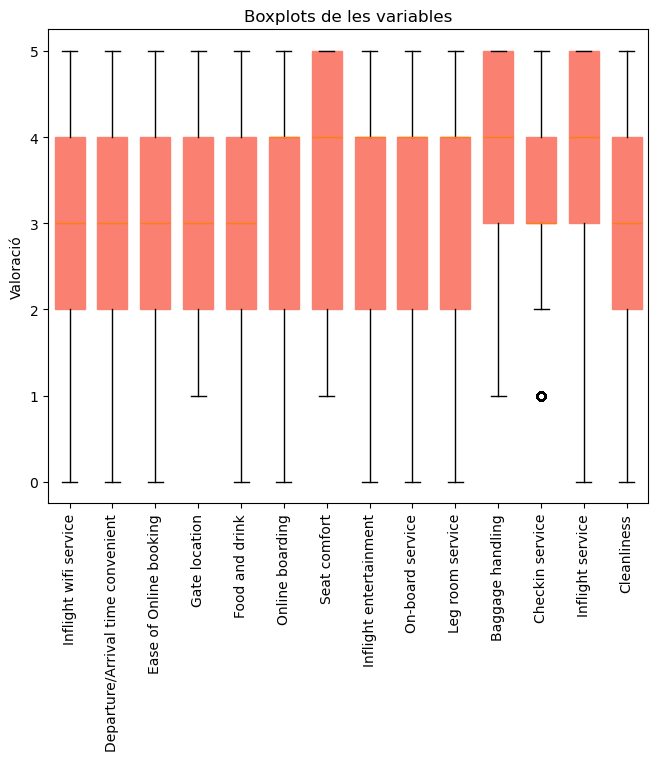

In [13]:
import matplotlib.pyplot as plt

variables = ['Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']

plt.figure(figsize=(10, 6))
plt.subplots_adjust(left=0.3, top=0.9)

boxes = plt.boxplot(data[variables], patch_artist=True, widths=0.7, vert=True)  # Cambiar color a rosa clarito

for box in boxes['boxes']:
    box.set(color='#FA8072')

plt.title("Boxplots de les variables")
plt.ylabel("Valoració")
plt.xticks(range(1, len(variables) + 1), variables, rotation=90)

plt.show()

/Users/ainalluis/Documents/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


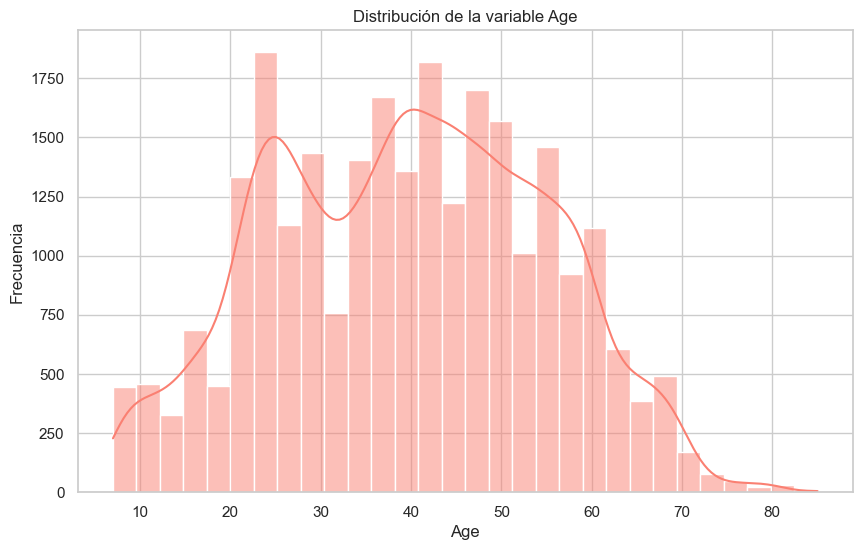

/Users/ainalluis/Documents/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


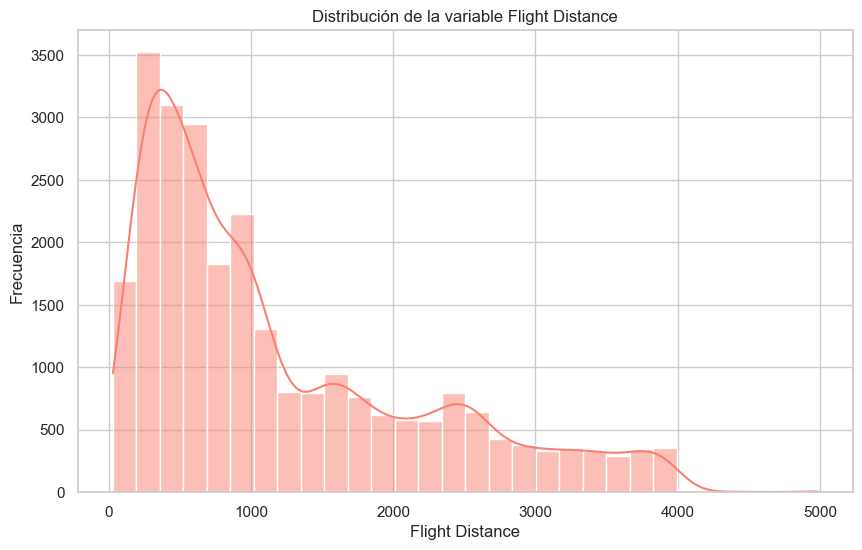

/Users/ainalluis/Documents/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


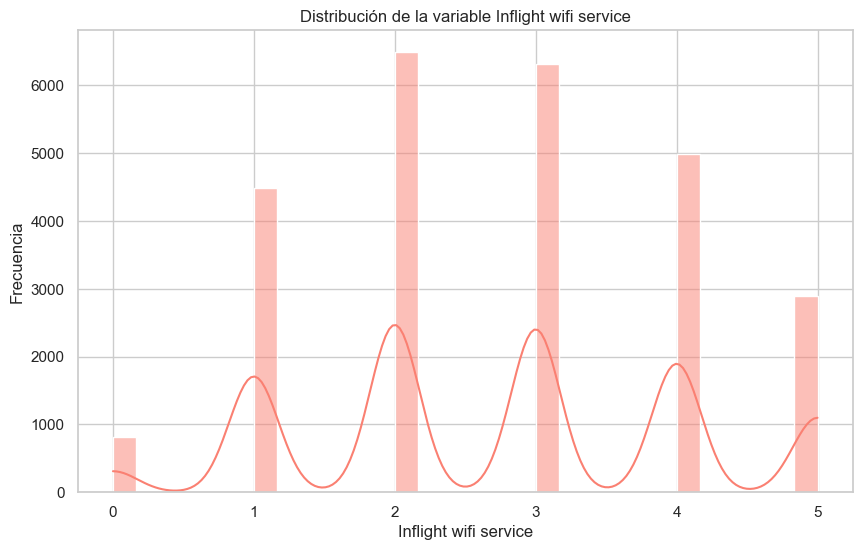

/Users/ainalluis/Documents/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


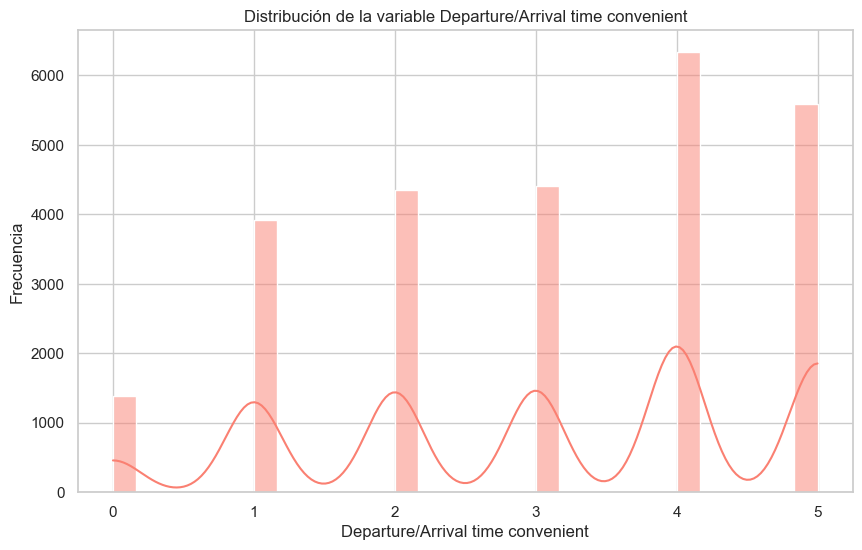

/Users/ainalluis/Documents/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


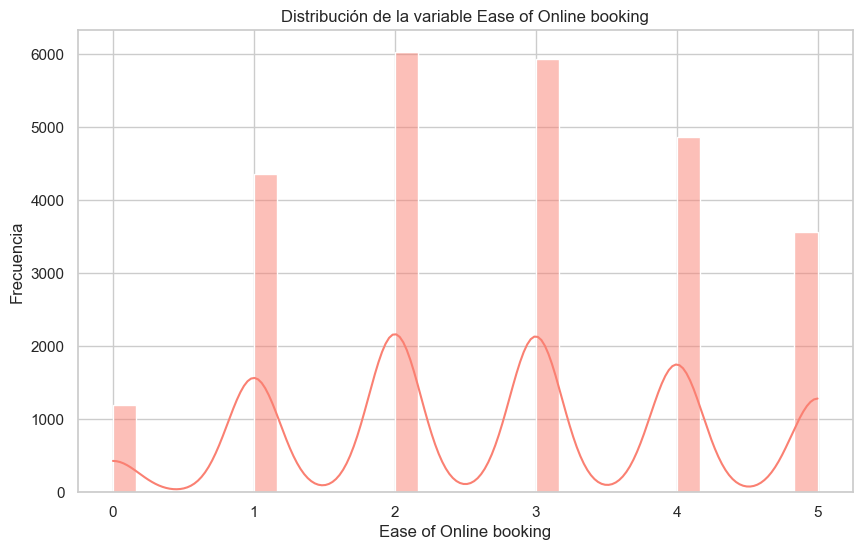

/Users/ainalluis/Documents/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


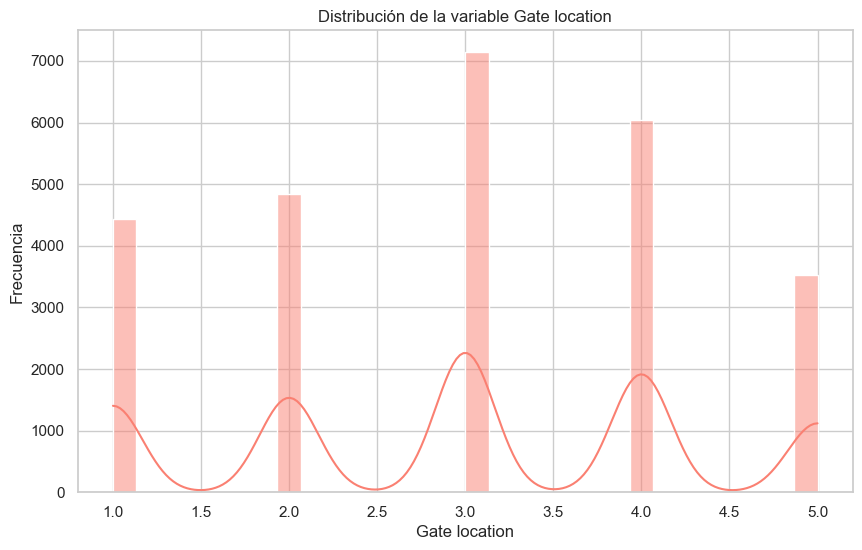

/Users/ainalluis/Documents/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


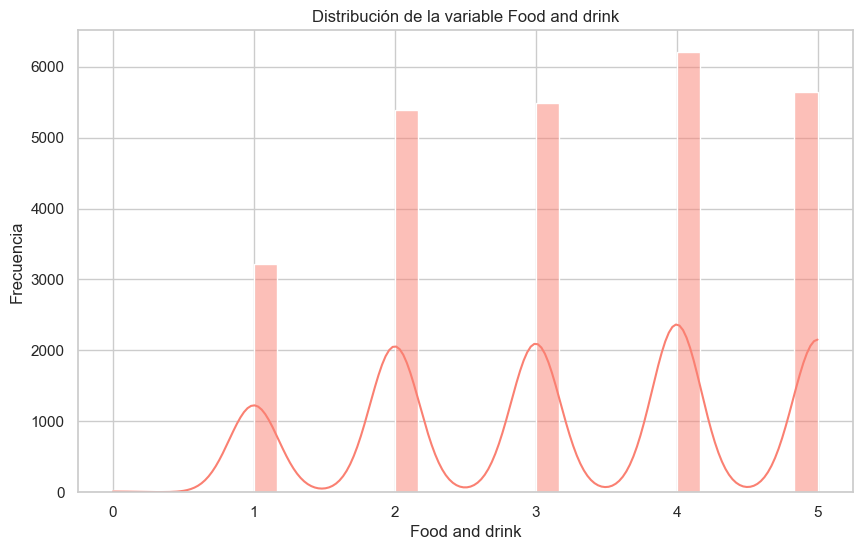

/Users/ainalluis/Documents/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


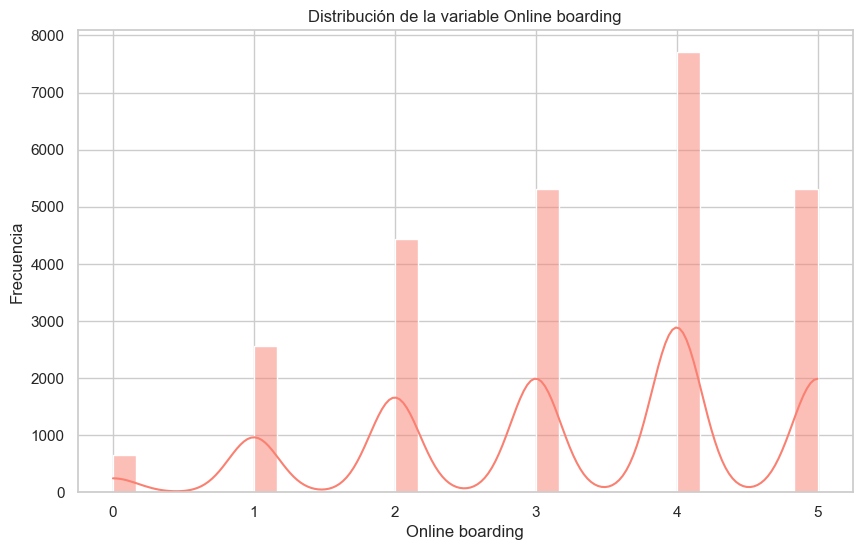

/Users/ainalluis/Documents/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


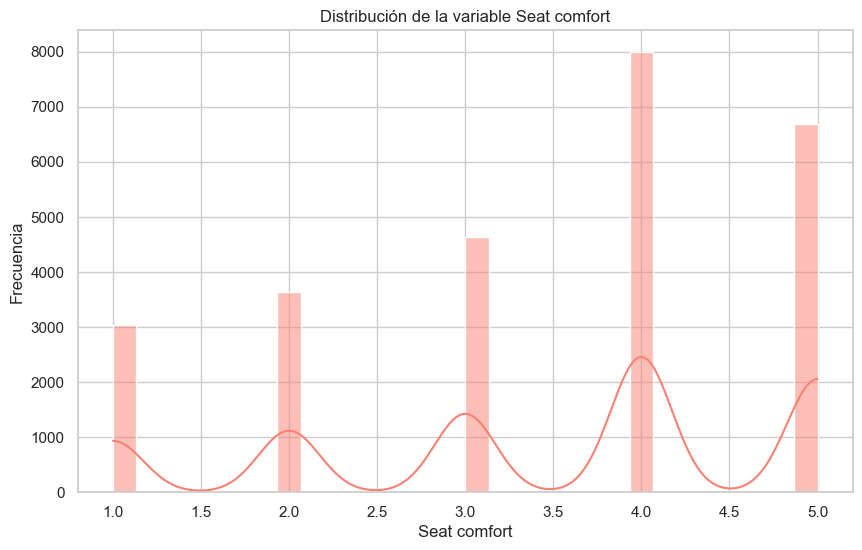

/Users/ainalluis/Documents/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


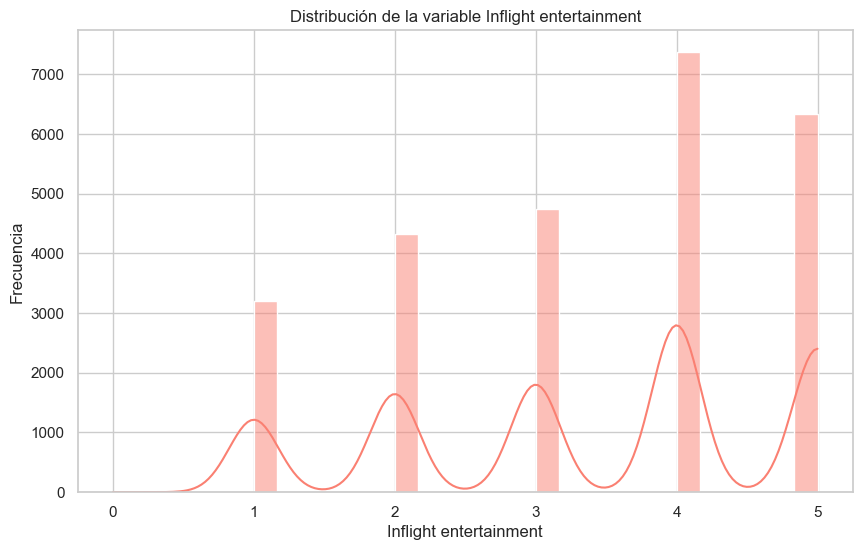

/Users/ainalluis/Documents/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


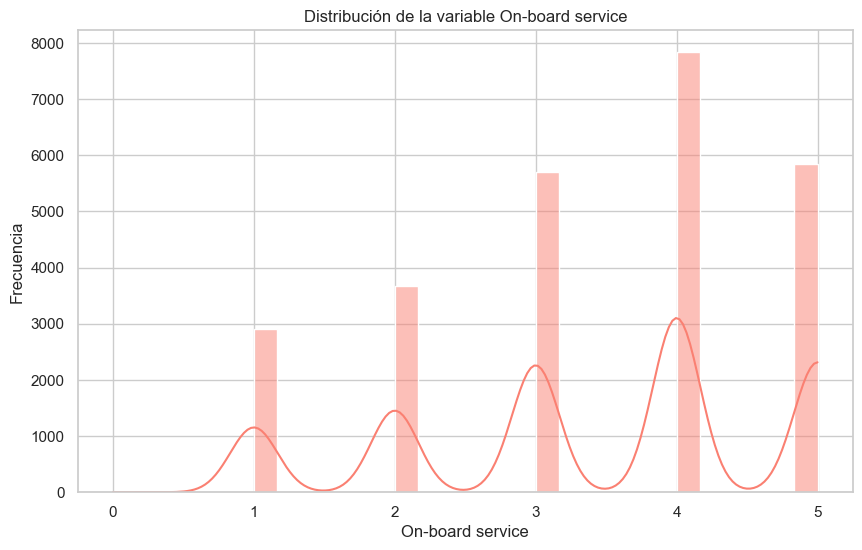

/Users/ainalluis/Documents/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


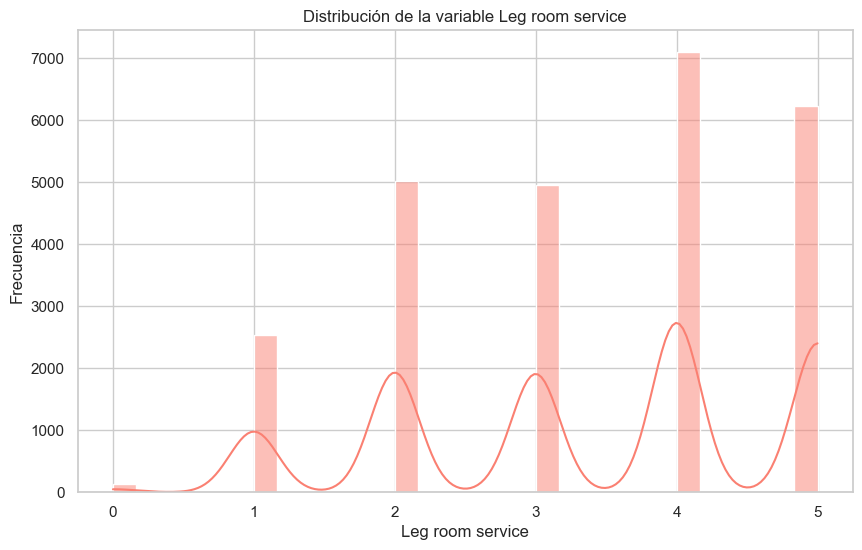

/Users/ainalluis/Documents/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


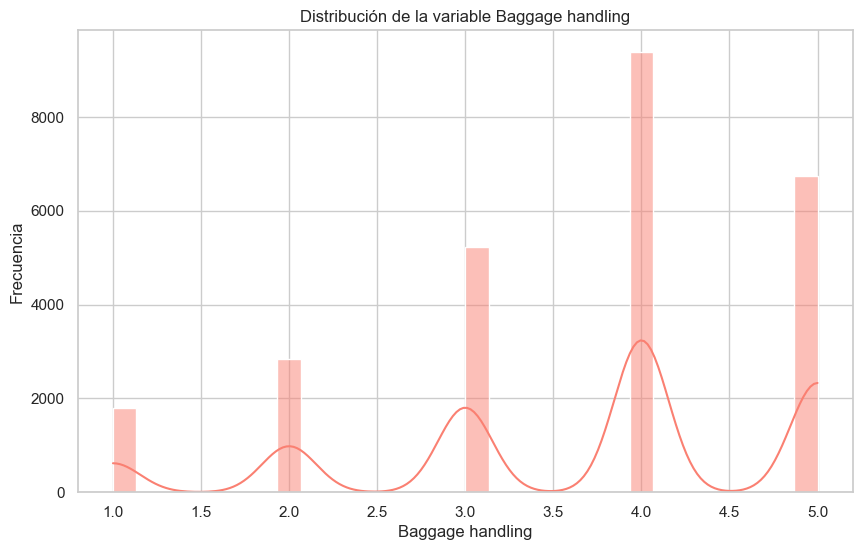

/Users/ainalluis/Documents/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


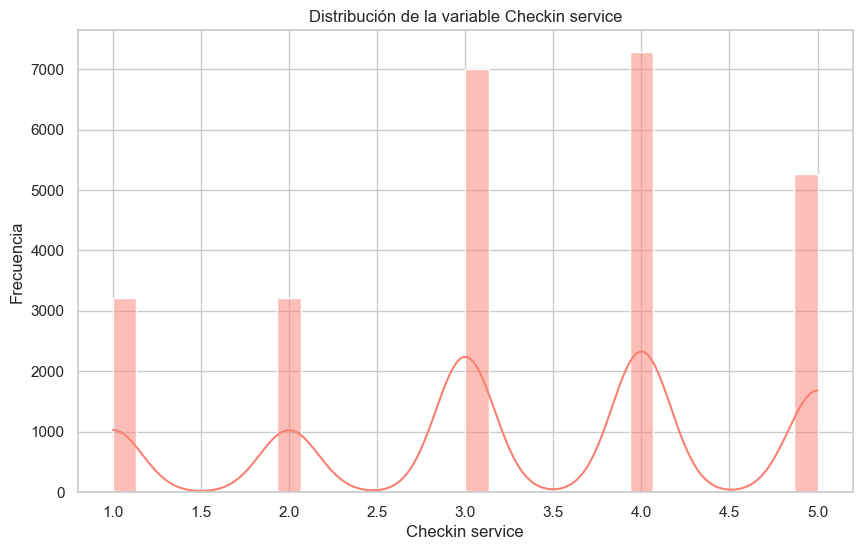

/Users/ainalluis/Documents/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


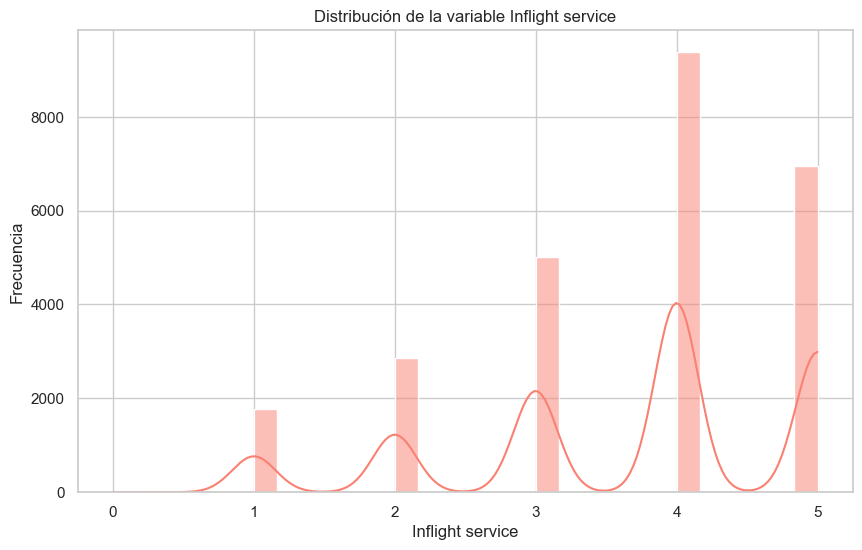

/Users/ainalluis/Documents/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


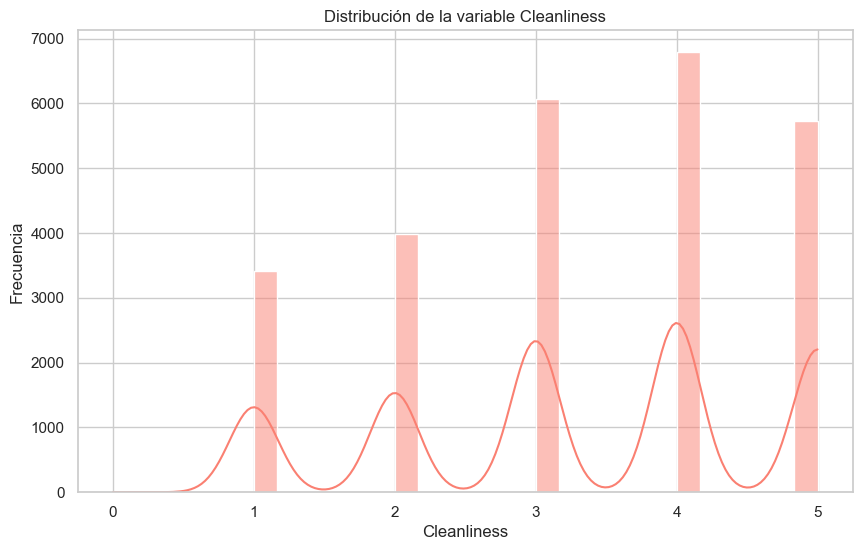

/Users/ainalluis/Documents/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


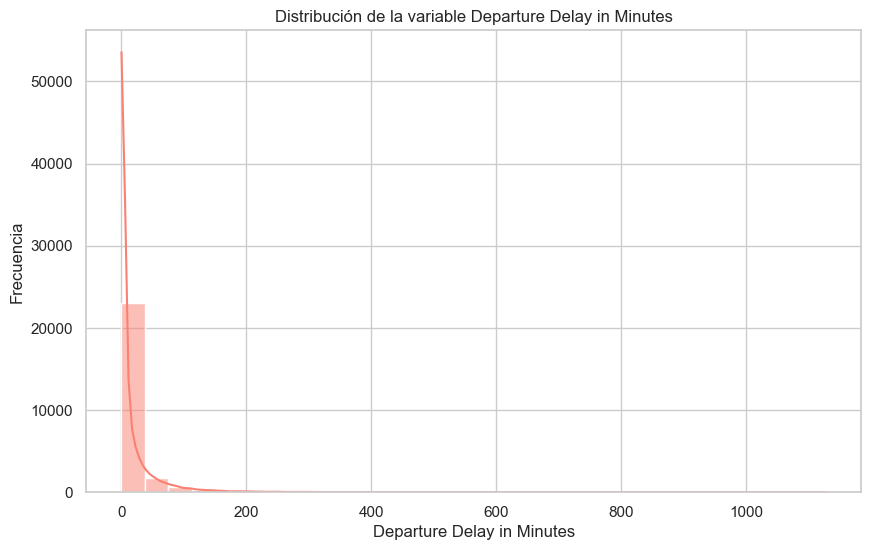

/Users/ainalluis/Documents/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


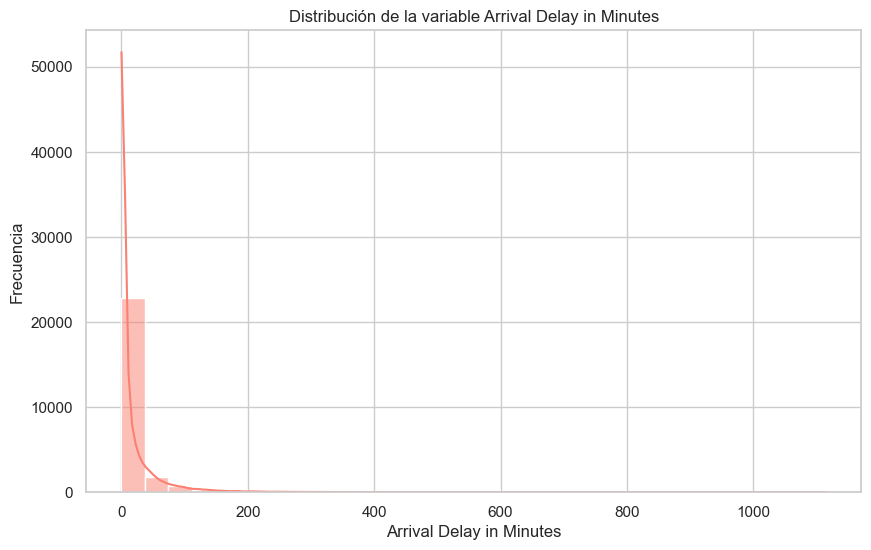

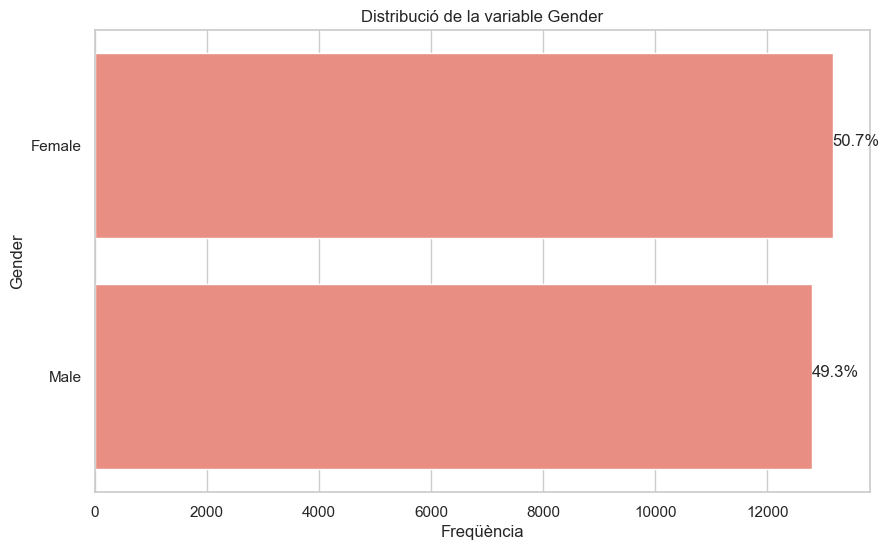

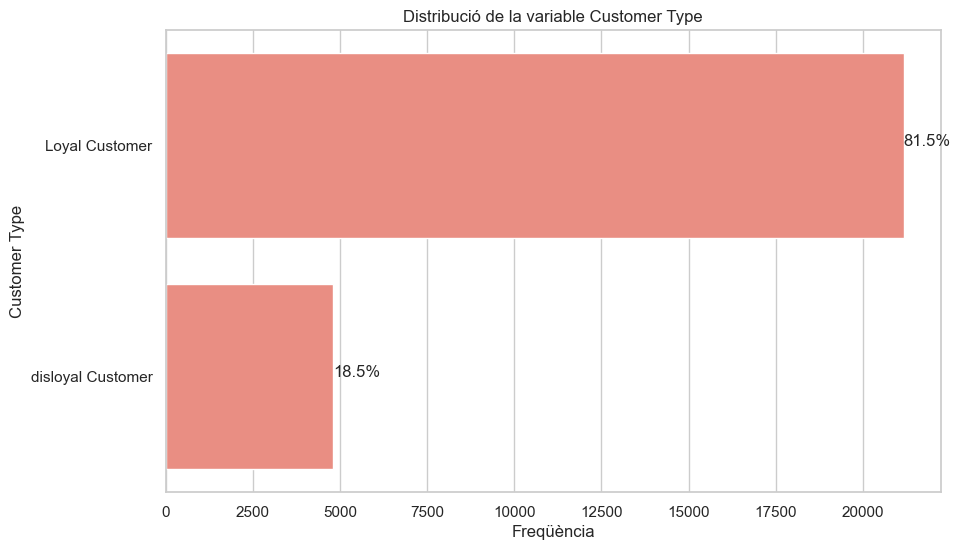

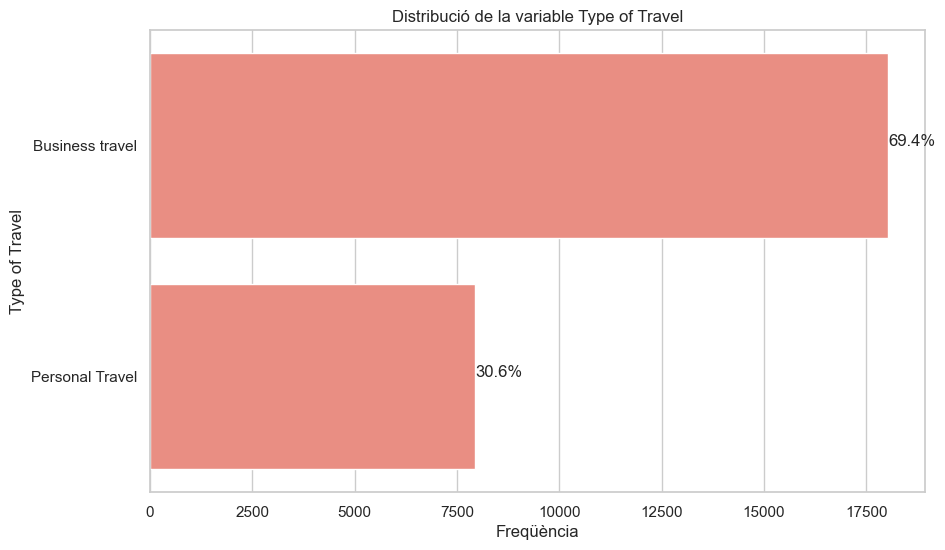

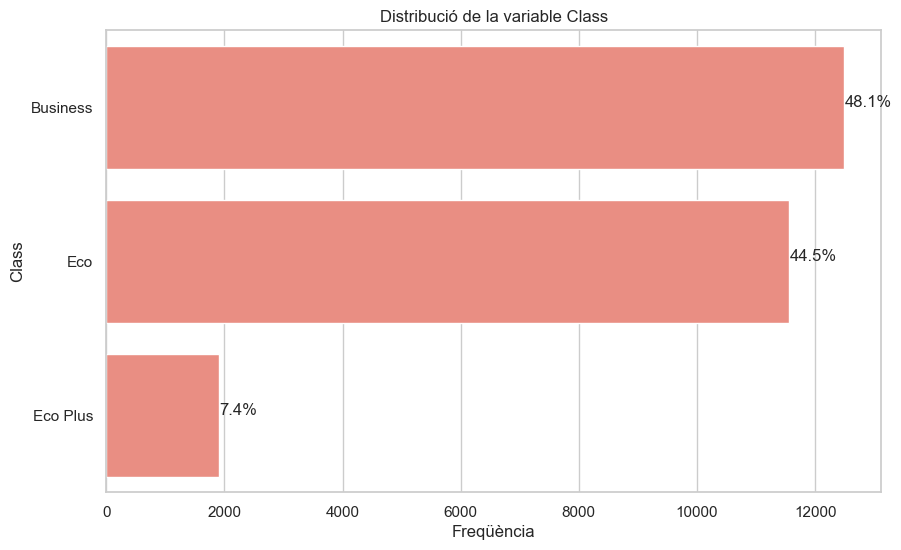

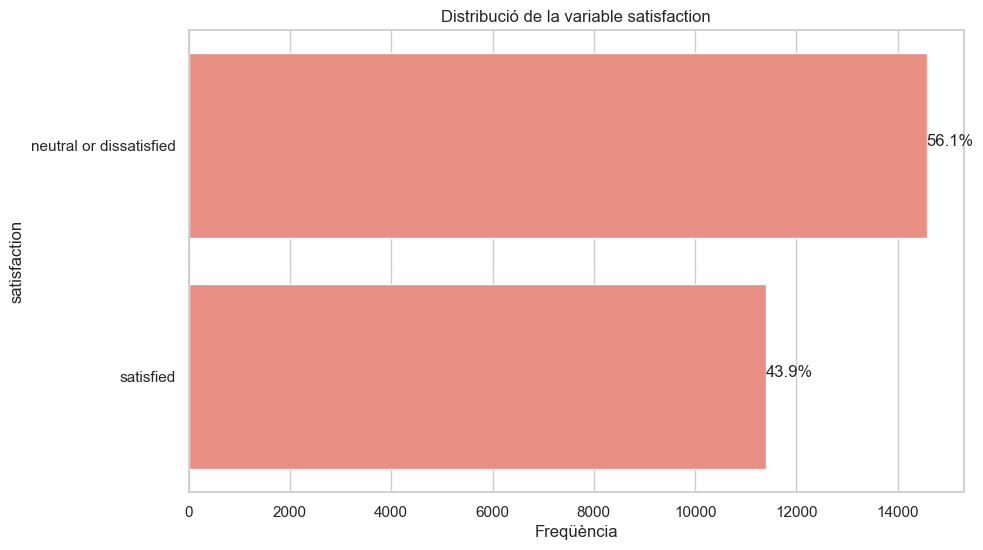

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")  

pink = "#FA8072"

for col in numeric_vars:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col], kde=True, bins=30, color=pink)
    plt.title(f'Distribución de la variable {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")  
pink = "#FA8072"

for col in categorical_vars:
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(y=col, data=data, order=data[col].value_counts().index, color=pink)
    plt.title(f'Distribució de la variable {col}')
    plt.xlabel('Freqüència')
    plt.ylabel(col)

    total = len(data[col])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width() / total)
        x = p.get_width() + 0.02
        y = p.get_y() + p.get_height() / 2
        ax.annotate(percentage, (x, y))

    plt.show()

Age                                     Axes(0.125,0.747241;0.168478x0.132759)
Flight Distance                      Axes(0.327174,0.747241;0.168478x0.132759)
Inflight wifi service                Axes(0.529348,0.747241;0.168478x0.132759)
Departure/Arrival time convenient    Axes(0.731522,0.747241;0.168478x0.132759)
Ease of Online booking                  Axes(0.125,0.587931;0.168478x0.132759)
Gate location                        Axes(0.327174,0.587931;0.168478x0.132759)
Food and drink                       Axes(0.529348,0.587931;0.168478x0.132759)
Online boarding                      Axes(0.731522,0.587931;0.168478x0.132759)
Seat comfort                            Axes(0.125,0.428621;0.168478x0.132759)
Inflight entertainment               Axes(0.327174,0.428621;0.168478x0.132759)
On-board service                     Axes(0.529348,0.428621;0.168478x0.132759)
Leg room service                     Axes(0.731522,0.428621;0.168478x0.132759)
Baggage handling                         Axes(0.125,

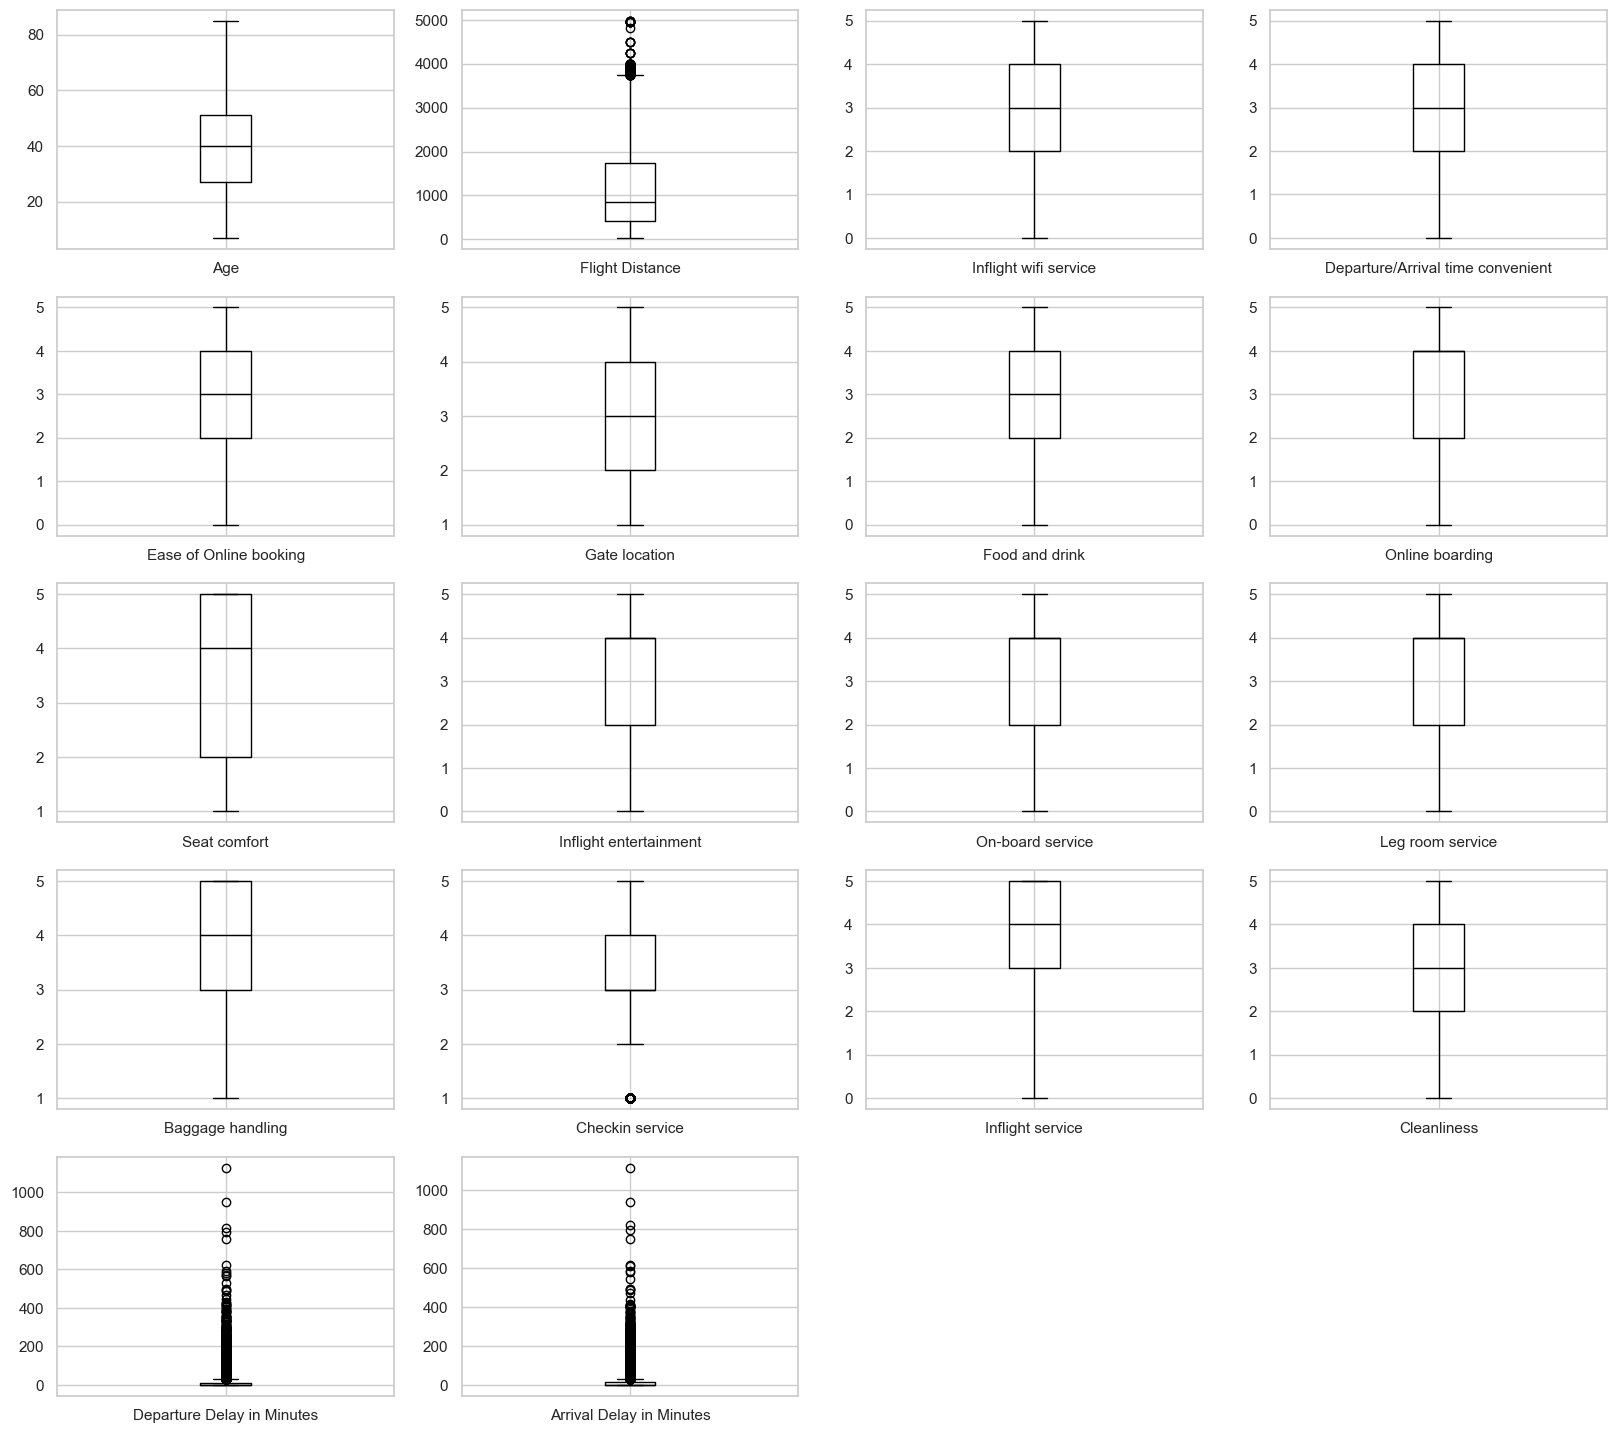

In [15]:
data.plot(subplots =True, kind = 'box', layout = (5,4), figsize = (20,18), color = 'black')

Veiem que hi ha tres variables amb valors outliers: "Flight Distance" "Departure Delay" i "Arrival Delay". Ara analitzarem les variables per comprovar la importància dels outliers:

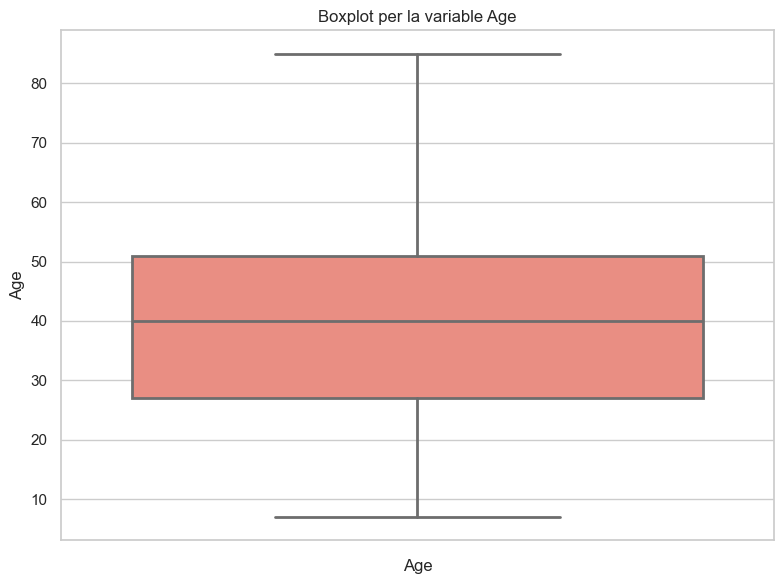

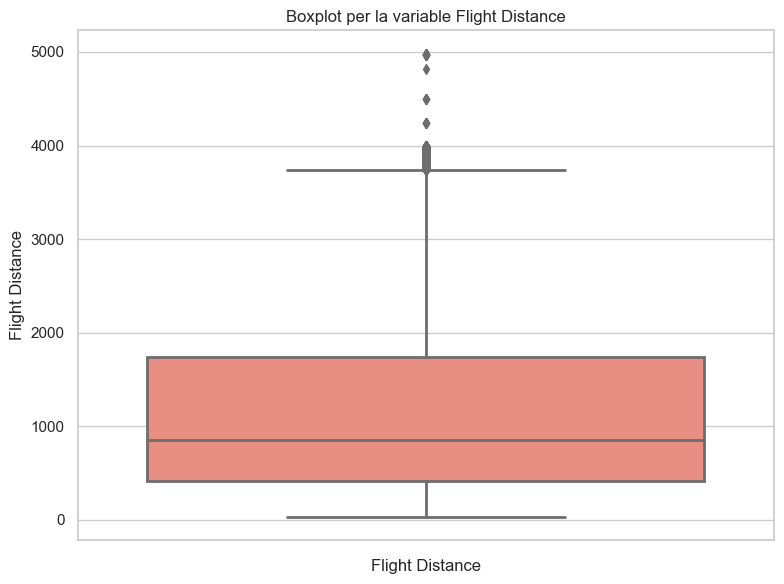

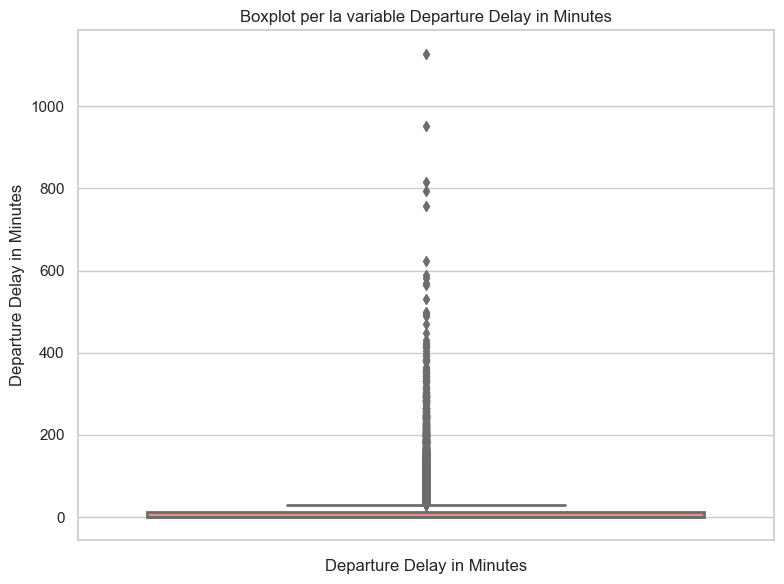

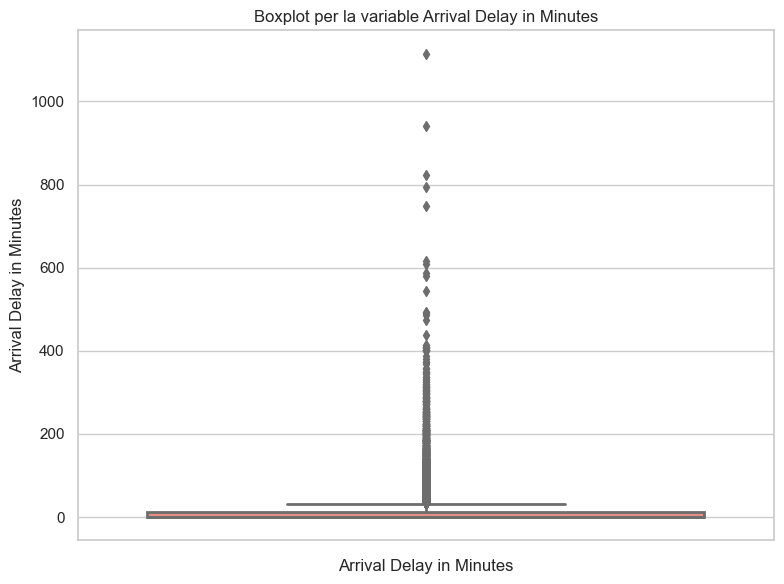

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_boxplot(data, variable):
    plt.figure(figsize=(8, 6))

    sns.boxplot(data=data, y=variable, color='#FA8072', linewidth=2)
    plt.xlabel(variable)
    plt.title('Boxplot per la variable {}'.format(variable))

    plt.tight_layout()
    plt.show()

plot_boxplot(data, 'Age')
plot_boxplot(data, 'Flight Distance')
plot_boxplot(data, 'Departure Delay in Minutes')
plot_boxplot(data, 'Arrival Delay in Minutes')


## ESTADÍSTICA GENERAL

In [19]:
columnas_interes = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Ease of Online booking',
                    'Checkin service', 'Online boarding', 'Gate location', 'On-board service', 'Seat comfort',
                    'Leg room service', 'Cleanliness', 'Food and drink', 'Inflight service',
                    'Inflight wifi service', 'Inflight entertainment', 'Baggage handling']

estadisticas_df = pd.DataFrame({
    'MITJANA': data[columnas_interes].mean(),
    'MÀXIM': data[columnas_interes].max(),
    'MÍNIM': data[columnas_interes].min(),
    'DESVIACIÓ ESTÀNDARD': data[columnas_interes].std(),
    'VARIANÇA': data[columnas_interes].var()
})
print(estadisticas_df)

                                MITJANA   MÀXIM  MÍNIM  DESVIACIÓ ESTÀNDARD  \
Age                           39.620958    85.0    7.0            15.135685   
Flight Distance             1193.788459  4983.0   31.0           998.683999   
Departure Delay in Minutes    14.306090  1128.0    0.0            37.423160   
Arrival Delay in Minutes      14.740857  1115.0    0.0            37.517539   
Ease of Online booking         2.756775     5.0    0.0             1.412951   
Checkin service                3.314175     5.0    1.0             1.269332   
Online boarding                3.261665     5.0    0.0             1.355536   
Gate location                  2.977094     5.0    1.0             1.282133   
On-board service               3.385664     5.0    0.0             1.282088   
Seat comfort                   3.449222     5.0    1.0             1.320090   
Leg room service               3.350169     5.0    0.0             1.318862   
Cleanliness                    3.286226     5.0    0

## ANÀLISI MULTIVARIANT

VARIABLES NUMERIQUES VS NUMERIQUES

/var/folders/kb/zy056hsd47zcyv76p913_35w0000gn/T/ipykernel_38345/1906540233.py:16: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_correlation_matrix = correlation_matrix.style.applymap(highlight_strong_correlations)


,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
Age,1.000000,0.099000,-0.004000,-0.007000
Flight Distance,0.099000,1.000000,0.003000,0.000000
Departure Delay in Minutes,-0.004000,0.003000,1.000000,0.965000
Arrival Delay in Minutes,-0.007000,0.000000,0.965000,1.000000


/Users/ainalluis/Documents/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ainalluis/Documents/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ainalluis/Documents/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ainalluis/Documents/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is de

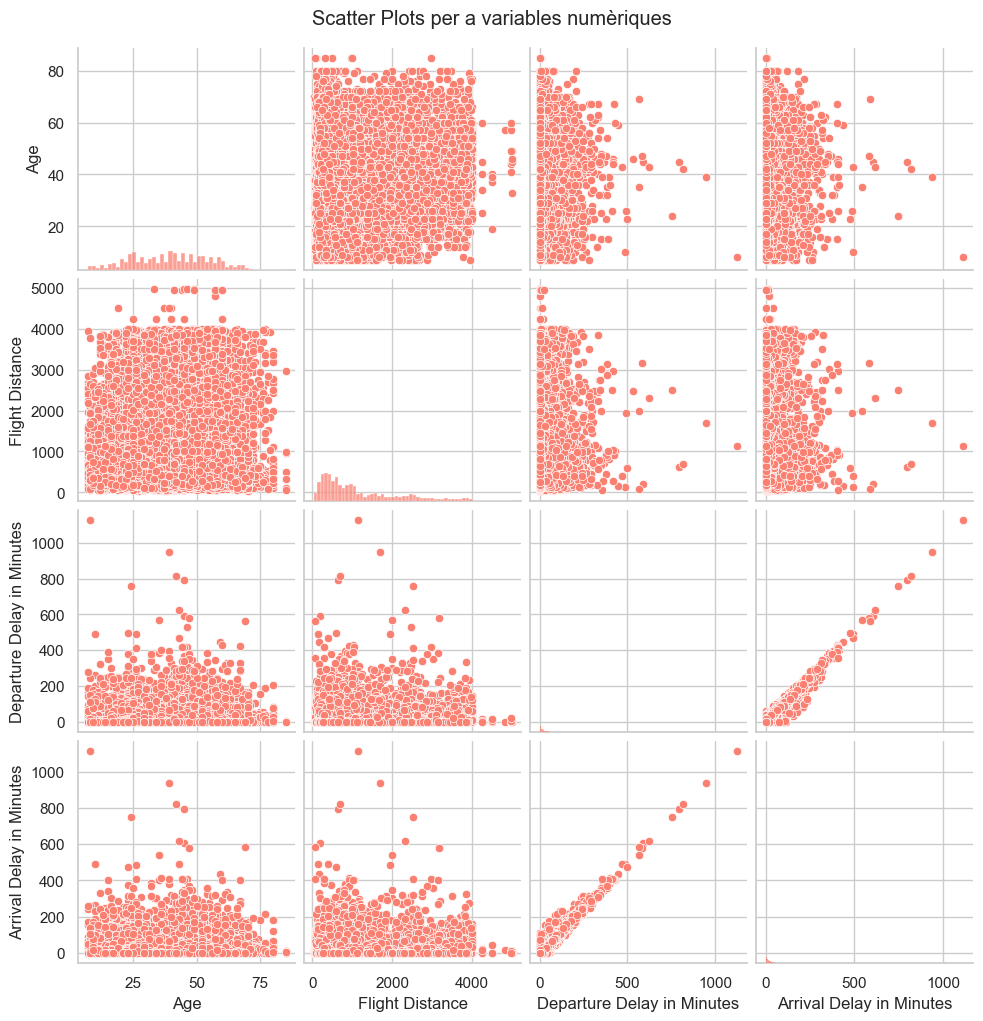

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
numeric_data = data[numeric_columns]
correlation_matrix = numeric_data.corr().round(3)

# Función para aplicar el estilo condicional
def highlight_strong_correlations(val):
    color = 'background-color: #FA8072' if abs(val) > 0.5 else ''
    return color

# Aplicar el estilo a la matriz de correlación
styled_correlation_matrix = correlation_matrix.style.applymap(highlight_strong_correlations)

# Mostrar la matriz de correlación estilizada
display(styled_correlation_matrix)

# Crear pairplot
sns.pairplot(numeric_data, plot_kws={'color': '#FA8072'}, diag_kws={'color': '#FA8072'})
plt.suptitle('Scatter Plots per a variables numèriques', y=1.02)  # Adjust title position
plt.show()

/Users/ainalluis/Documents/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ainalluis/Documents/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ainalluis/Documents/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ainalluis/Documents/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is de

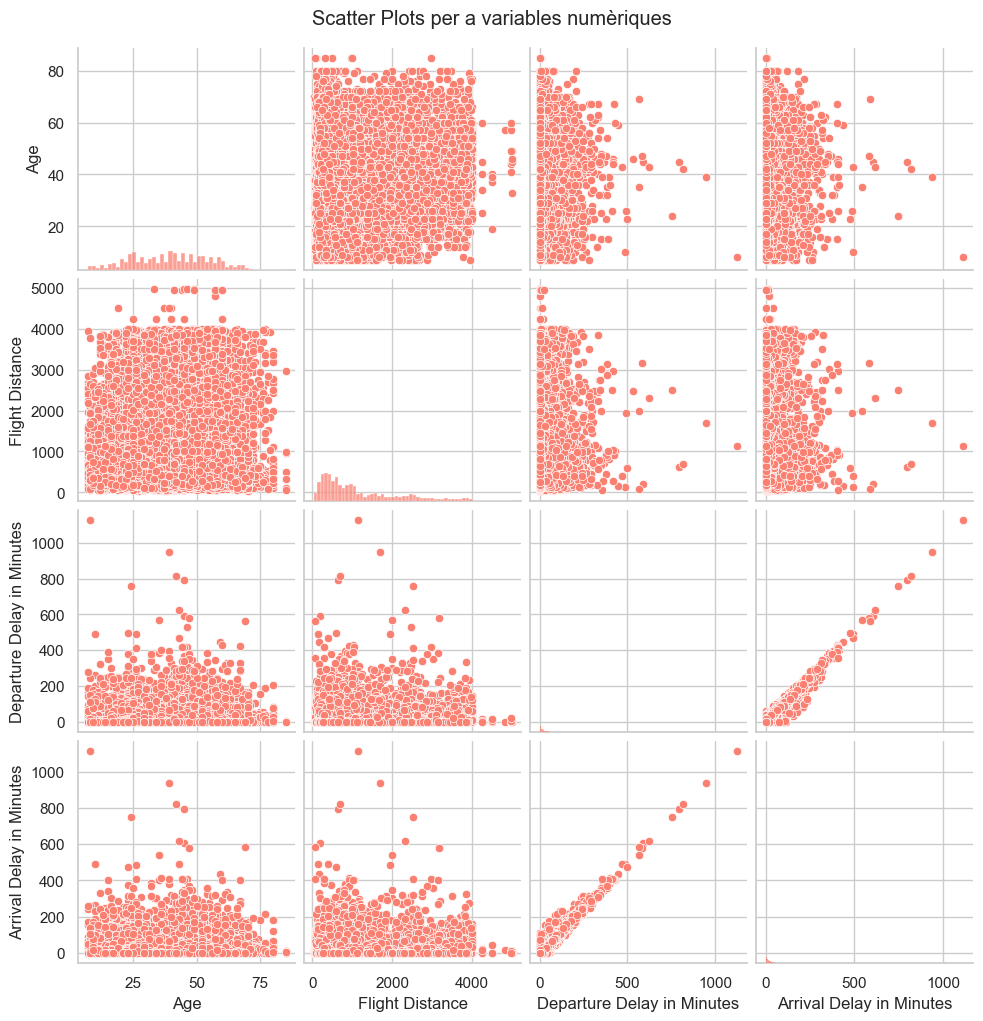

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
Age,1.000,0.099,-0.004,-0.007
Flight Distance,0.099,1.000,0.003,0.000
Departure Delay in Minutes,-0.004,0.003,1.000,0.965
Arrival Delay in Minutes,-0.007,0.000,0.965,1.000


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
numeric_data = data[numeric_columns]
correlation_matrix = numeric_data.corr().round(3)


sns.pairplot(numeric_data, plot_kws={'color': '#FA8072'}, diag_kws={'color': '#FA8072'})
plt.suptitle('Scatter Plots per a variables numèriques', y=1.02)  # Adjust title position
plt.show()

correlation_matrix

/Users/ainalluis/Documents/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ainalluis/Documents/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ainalluis/Documents/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ainalluis/Documents/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is de

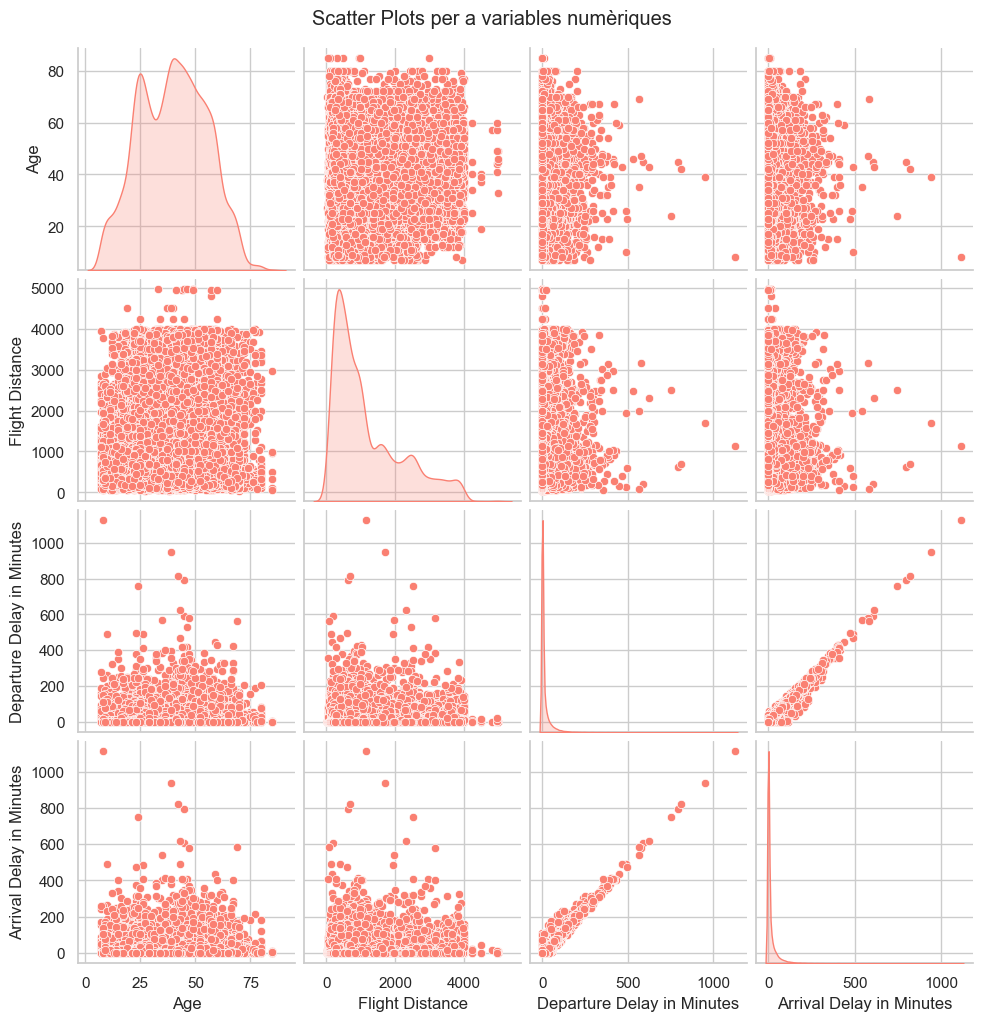

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
numeric_data = data[numeric_columns]

correlation_matrix = numeric_data.corr().round(3)  

sns.pairplot(numeric_data, 
             plot_kws={'color': '#FA8072'}, 
             diag_kws={'color': '#FA8072'}, 
             diag_kind='kde')

plt.suptitle('Scatter Plots per a variables numèriques', y=1.02)  
plt.show()

In [ ]:
import pandas as pd
contingency_table = pd.crosstab(data['Age'], data['Gender'])

from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Estadística de chi-cuadrado:", chi2)
print("p-valor:", p)
print("Grados de libertad:", dof)
print("Frecuencias esperadas:")

In [ ]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(data['Inflight wifi service'], data['Customer Type'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
contingency_table, chi2, p_value

In [ ]:
discrete_vars = [col for col in numeric_data.columns if len(numeric_data[col].unique()) < 10]
categorical_vars = data.select_dtypes(include=['object']).columns.tolist()

discrete_vars, categorical_vars

VARIABLES NUMÈRIQUES VS CATEGÒRIQUES

In [ ]:
discrete_numeric_vars = [
    'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',
    'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
    'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling',
    'Checkin service', 'Inflight service', 'Cleanliness'
]

categorical_vars = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

from scipy.stats import chi2_contingency

fig, axes = plt.subplots(nrows=len(discrete_numeric_vars), ncols=len(categorical_vars), figsize=(18, 50))

for i, num_var in enumerate(discrete_numeric_vars):
    for j, cat_var in enumerate(categorical_vars):
        contingency_table = pd.crosstab(data[num_var], data[cat_var])
        chi2, p_value, dof, expected = chi2_contingency(contingency_table)
        sns.countplot(x=num_var, hue=cat_var, data=data, ax=axes[i, j])
        axes[i, j].set_title(f'{num_var} vs {cat_var}\nChi2: {chi2:.2f}, p-value: {p_value:.2e}')
        axes[i, j].legend(title=cat_var, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import chi2_contingency

colors = ['#FA8072', 'skyblue']
custom_palette = sns.set_palette(sns.color_palette(colors))

for num_var in discrete_numeric_vars:
    for cat_var in categorical_vars:
        plt.figure(figsize=(10, 6))
        contingency_table = pd.crosstab(data[num_var], data[cat_var])
        chi2, p_value, dof, expected = chi2_contingency(contingency_table)
        sns.countplot(x=num_var, hue=cat_var, data=data, palette=custom_palette)
        plt.title(f'{num_var} vs {cat_var}\nChi2: {chi2:.2f}, p-value: {p_value:.2e}')
        plt.legend(title=cat_var, bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.show()


VARIABLES CATEGÒRIQUES VS CATEGÒRIQUES

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic
from scipy.stats import chi2_contingency

color_scheme_updated = {
    'Male': 'skyblue',  
    'Female': '#FA8072',  
    'Loyal Customer': '#FA8072',  
    'disloyal Customer': 'skyblue',  
    'Business travel': 'skyblue',  
    'Personal Travel': '#FA8072',  
    'Eco': 'skyblue',  
    'Eco Plus': 'skyblue',  
    'Business': '#0000FF',  
    'satisfied': 'skyblue',  
    'neutral or dissatisfied': '#FA8072'  
}

combinations = [
    ('Gender', 'Customer Type'),
    ('Gender', 'Type of Travel'),
    ('Gender', 'Class'),
    ('Gender', 'satisfaction'),
    ('Customer Type', 'Type of Travel'),
    ('Customer Type', 'Class'),
    ('Customer Type', 'satisfaction'),
    ('Type of Travel', 'Class'),
    ('Type of Travel', 'satisfaction'),
    ('Class', 'satisfaction')
]


def mosaic_and_chi2_test_corrected_colors(df, cat_var1, cat_var2, colors):
    crosstab = pd.crosstab(df[cat_var1], df[cat_var2])
    plt.figure(figsize=(10, 6))
    props = lambda key: {'color': colors.get(key[1], 'white')}  # Use key[1] to match the right part of the pair
    mosaic(df, [cat_var1, cat_var2], properties=props, title=f'Mosaic Plot: {cat_var1} vs {cat_var2}', gap=0.02)
    plt.show()
    
    chi2, p, dof, _ = chi2_contingency(crosstab)
    return chi2, p

results_corrected_colors = {}
for cat_var1, cat_var2 in combinations:
    chi2, p = mosaic_and_chi2_test_corrected_colors(data, cat_var1, cat_var2, color_scheme_updated)
    results_corrected_colors[f'{cat_var1} vs {cat_var2}'] = {'Chi2': chi2, 'p-value': p}

results_corrected_colors


VARIABLES NUMÈRIQUES CONTÍNUES I CATEGÒRIQUES

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, ttest_ind
def analyze_numeric_categorical_custom_colors(df, numeric_var, categorical_var, palette):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=categorical_var, y=numeric_var, data=df, palette=palette)
    plt.title(f'Boxplot of {numeric_var} by {categorical_var}')
    plt.show()
    
    categories = df[categorical_var].unique()
    
    if len(categories) > 2:
        groups = [df[df[categorical_var] == cat][numeric_var] for cat in categories]
        f_stat, p_value = f_oneway(*groups)
        test = "ANOVA"
    else:
        group1 = df[df[categorical_var] == categories[0]][numeric_var]
        group2 = df[df[categorical_var] == categories[1]][numeric_var]
        t_stat, p_value = ttest_ind(group1, group2)
        test = "T-test"
    
    return test, p_value

custom_palette = {
    'Male': '#FA8072', 
    'Female': '#FA8072', 
    'Loyal Customer': '#FA8072', 
    'disloyal Customer': '#FA8072',
    'Business travel': '#FA8072', 
    'Personal Travel': '#FA8072', 
    'Eco': '#FA8072', 
    'Eco Plus': '#FA8072',
    'Business': '#FA8072',
    'satisfied': '#FA8072', 
    'neutral or dissatisfied': '#FA8072'
}

results_numerical_categorical_custom_colors = {}
for numeric_var in ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']:
    for categorical_var in ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']:
        test, p_value = analyze_numeric_categorical_custom_colors(data, numeric_var, categorical_var, custom_palette)
        results_numerical_categorical_custom_colors[f'{numeric_var} vs {categorical_var}'] = {'Test': test, 'p-value': p_value}

results_numerical_categorical_custom_colors


# MODELS PREDICTIUS


In [ ]:
excluded_columns = []  
excluded_columns.append("satisfaction")  


X = dades.drop(columns=excluded_columns + ["satisfaction"])
y = dades["satisfaction"]

print(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

TRAIN AND TEST SETS

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
dades['satisfaction'] = dades['satisfaction'].map({'neutral or dissatisfied': 0, 'satisfied': 1})
print(dades['satisfaction'].value_counts())

In [ ]:
excluded_columns = []  
excluded_columns.append("satisfaction")  


X = dades.drop(columns=excluded_columns + ["satisfaction"])
y = dades["satisfaction"]

print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

0: neutral or dissatisfied
1: satisfied

### RANDOM FOREST

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [200, 250, 500, 1000],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'bootstrap': [True, False]
}

rf_model = RandomForestRegressor(random_state=410)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Mejores parámetros:", best_params)

best_rf_model = RandomForestRegressor(**best_params, random_state=410)

best_rf_model.fit(X_train, y_train)
y_pred = best_rf_model.predict(X_test)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

umbral = 0.5
y_pred_Rf = (y_pred > umbral).astype(int)

conf_matrix = confusion_matrix(y_test, y_pred_Rf)
categories = ['neutral or disatisfied', 'satisfied']
conf_matrix_df = pd.DataFrame(conf_matrix, index=categories, columns=categories)

class_accuracy = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
class_accuracy_percentage = ["{:.2f}%".format(acc * 100) for acc in class_accuracy]
conf_matrix_df['Accuracy'] = class_accuracy_percentage
conf_matrix_df

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
accuracy_rf = accuracy_score(y_test, y_pred_Rf)
print("Accuracy:", accuracy_rf)
precision_rf = precision_score(y_test, y_pred_Rf)
recall_rf = recall_score(y_test, y_pred_Rf)
f1_rf = f1_score(y_test, y_pred_Rf)
print("Precision:",precision_rf)
print("Recall:",recall_rf)
print("F1 score:",f1_rf)

### LGBM CLASSIFIER

In [ ]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier


param_grid = {
    'n_estimators': [150,200,500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'reg_alpha': [0.0, 0.1, 0.5],
    'reg_lambda': [0.0, 0.1, 0.5]
}


lgbm_model = LGBMClassifier(random_state=410)
grid_search = GridSearchCV(estimator=lgbm_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Mejores parámetros:", best_params)

best_lgbm_model = LGBMClassifier(**best_params, random_state=410)

best_lgbm_model.fit(X_train, y_train)
y_pred_lgbm = best_lgbm_model.predict(X_test)

In [ ]:
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier(n_estimators=200, max_depth=5, learning_rate=0.1, subsample=0.8,
                            reg_alpha=0.0, reg_lambda=0.0, random_state=410)

lgbm_model.fit(X_train, y_train)
y_pred_lgbm = lgbm_model.predict(X_test)

In [ ]:
conf_matrix_lgbm = confusion_matrix(y_test, y_pred_lgbm)
categories = ['neutral or dissatisfied', 'satisfied']

conf_matrix_df = pd.DataFrame(conf_matrix_lgbm, index=categories, columns=categories)
class_accuracy = np.diag(conf_matrix_lgbm) / np.sum(conf_matrix_lgbm, axis=1)

class_accuracy_percentage = ["{:.2f}%".format(acc * 100) for acc in class_accuracy]
conf_matrix_df['Accuracy'] = class_accuracy_percentage
conf_matrix_df

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
print("Accuracy:", accuracy_lgbm)

precision_lgbm = precision_score(y_test, y_pred_lgbm)
recall_lgbm = recall_score(y_test, y_pred_lgbm)
f1_lgbm = f1_score(y_test, y_pred_lgbm)
print("Precision:",precision_lgbm)
print("Recall:",recall_lgbm)
print("F1 Score:",f1_lgbm)

### EXTRA TREES CLASSIFIER

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier

param_grid = {
    'n_estimators': [50, 100, 150,200,500],  
    'max_depth': [None, 10, 20],  
    'criterion': ['gini', 'entropy'],  
    'bootstrap': [True, False],  
}


extra_trees_model = ExtraTreesClassifier(random_state=410)
grid_search = GridSearchCV(estimator=extra_trees_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Mejores parámetros:", best_params)

best_extra_trees_model = ExtraTreesClassifier(**best_params, random_state=410)
best_extra_trees_model.fit(X_train, y_train)
y_pred_et = best_extra_trees_model.predict(X_test)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix

conf_matrix_extratrees = confusion_matrix(y_test, y_pred_et)
categories = ['neutral or dissatisfied', 'satisfied']
conf_matrix_df = pd.DataFrame(conf_matrix_extratrees, index=categories, columns=categories)
class_accuracy = np.diag(conf_matrix_extratrees) / np.sum(conf_matrix_extratrees, axis=1)

class_accuracy_percentage = ["{:.2f}%".format(acc * 100) for acc in class_accuracy]
conf_matrix_df['Accuracy'] = class_accuracy_percentage
conf_matrix_df

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

accuracy_et = accuracy_score(y_test, y_pred_et)
print("Accuracy:", accuracy_et)
precision_et = precision_score(y_test, y_pred_et)
recall_et = recall_score(y_test, y_pred_et)
f1_et = f1_score(y_test, y_pred_et)
print("Precision:", precision_et)
print("Recall:", recall_et)
print("F1 Score:", f1_et)

### BAGGING CLASSIFIER

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier

param_grid = {
    'n_estimators': [50, 100, 150, 200, 500], 
    'max_samples': [0.5, 0.7, 1.0],  
    'max_features': [0.5, 0.7, 1.0],  
    'bootstrap': [True, False], 
    'bootstrap_features': [True, False] 
}


bagging_model = BaggingClassifier(random_state=410)
grid_search = GridSearchCV(estimator=bagging_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Mejores parámetros:", best_params)
best_bagging_model = BaggingClassifier(**best_params, random_state=410)

best_bagging_model.fit(X_train, y_train)
y_pred_bg = best_bagging_model.predict(X_test)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix

conf_matrix_bagging = confusion_matrix(y_test, y_pred_bg)
categories = ['neutral or dissatisfied', 'satisfied']
conf_matrix_df = pd.DataFrame(conf_matrix_bagging, index=categories, columns=categories)
class_accuracy = np.diag(conf_matrix_bagging) / np.sum(conf_matrix_bagging, axis=1)
class_accuracy_percentage = ["{:.2f}%".format(acc * 100) for acc in class_accuracy]
conf_matrix_df['Accuracy'] = class_accuracy_percentage
conf_matrix_df

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

accuracy_bg = accuracy_score(y_test, y_pred_bg)
print("Accuracy:", accuracy_bg)

precision_bg = precision_score(y_test, y_pred_bg)
recall_bg = recall_score(y_test, y_pred_bg)
f1_bg = f1_score(y_test, y_pred_bg)
print("Precision:",precision_bg)
print("Recall:",recall_bg)
print("F1 score",f1_bg)

### DECISION TREE

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'max_depth': [None, 5, 10, 15,20],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'criterion': ['gini', 'entropy'],  
    'max_features': ['auto', 'sqrt', 'log2'],  
    'max_leaf_nodes': [None, 5, 10, 20] 
}

decision_tree_model = DecisionTreeClassifier(random_state=410)

grid_search = GridSearchCV(estimator=decision_tree_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Mejores parámetros:", best_params)
best_decision_tree_model = DecisionTreeClassifier(**best_params, random_state=410)

best_decision_tree_model.fit(X_train, y_train)
y_pred_Dt = best_decision_tree_model.predict(X_test)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix

conf_matrix_dt = confusion_matrix(y_test, y_pred_Dt)
categories = ['neutral or dissatisfied', 'satisfied']

conf_matrix_df = pd.DataFrame(conf_matrix_dt, index=categories, columns=categories)
class_accuracy = np.diag(conf_matrix_dt) / np.sum(conf_matrix_dt, axis=1)
class_accuracy_percentage = ["{:.2f}%".format(acc * 100) for acc in class_accuracy]
conf_matrix_df['Accuracy'] = class_accuracy_percentage
conf_matrix_df

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import accuracy_score

accuracy_dt = accuracy_score(y_test, y_pred_Dt)
print("Accuracy:", accuracy_dt)
precision_dt = precision_score(y_test, y_pred_Dt)
recall_dt = recall_score(y_test, y_pred_Dt)
f1_dt = f1_score(y_test, y_pred_Dt)
print("Precision:",precision_dt)
print("Recall:",recall_dt)
print("F1 Score:",f1_dt)

**XARXES NEURONALS**

In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential  
from keras.layers import Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(410)

model = Sequential([
    Dense(128, activation='relu', kernel_initializer='random_uniform', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu', kernel_initializer='random_uniform'),
    Dense(1, activation='sigmoid', kernel_initializer='random_uniform')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1, validation_data=(X_test, y_test))
y_pred_nn = model.predict(X_test)
y_pred_nn = (y_pred > 0.5).astype(int)



accuracy = accuracy_score(y_test, y_pred_nn)
precision = precision_score(y_test, y_pred_nn)
recall = recall_score(y_test, y_pred_nn)
f1 = f1_score(y_test, y_pred_nn)
conf_matrix = confusion_matrix(y_test, y_pred_nn)
mse = mean_squared_error(y_test, y_pred_nn)

print("Exactitud (Accuracy):", accuracy)
print("Precisión (Precision):", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("MSE:",mse)

In [ ]:
conf_matrix_nn = confusion_matrix(y_test,y_pred_nn)
categories = ["neutral or disatisfied","satisfied"]
conf_matrix_nn = pd.DataFrame(conf_matrix_nn, index=categories, columns=categories)
conf_matrix_nn

In [ ]:
color_blue="#1f77b4"
color_coral="#FA8072"

plt.figure(figsize=(8, 6))
sns.set_palette("Set2")
plt.plot(history.history['accuracy'], label='Accuracy (Training)',color=color_blue)
plt.plot(history.history['val_accuracy'], label='Accuracy (Validation)',color=color_coral)
plt.title('Corba d\'aprenentatge de la xarxa neuronal (Accuracy)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
color_blue="#1f77b4"
color_coral="#FA8072"

plt.figure(figsize=(8, 6))
sns.set_palette("Set2")
plt.plot(history.history['loss'], label='Loss (Training)',color=color_blue)
plt.plot(history.history['val_loss'], label='Loss (Validation)',color=color_coral)
plt.title('Corba d\'aprenentatge de la xarxa neuronal (Loss)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

ENSEMBLE

In [ ]:
from collections import Counter

def voting_ensemble(*predictions):
    ensemble_predictions = []
    for instance_predictions in zip(*predictions):
        counts = Counter(instance_predictions)
        majority_vote = counts.most_common(1)[0][0]
        ensemble_predictions.append(majority_vote)
    return ensemble_predictions


ensemble_predictions = voting_ensemble(y_pred_et, y_pred_Rf, y_pred_bg,y_pred_Dt)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix

conf_matrix_dt = confusion_matrix(y_test, y_pred_Dt)
categories = ['neutral or dissatisfied', 'satisfied']

conf_matrix_df = pd.DataFrame(conf_matrix_dt, index=categories, columns=categories)
class_accuracy = np.diag(conf_matrix_dt) / np.sum(conf_matrix_dt, axis=1)
class_accuracy_percentage = ["{:.2f}%".format(acc * 100) for acc in class_accuracy]
conf_matrix_df['Accuracy'] = class_accuracy_percentage
conf_matrix_df

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_en = accuracy_score(y_test, ensemble_predictions)
print("Accuracy del ensemble:", accuracy_en)
precision_en = precision_score(y_test, ensemble_predictions)
recall_en = recall_score(y_test, ensemble_predictions)
f1_en = f1_score(y_test, ensemble_predictions)

print("Precisió del ensemble:",precision_en)
print("Recall del ensemble:",recall_en)
print("F1 Score del ensemble:",f1_en)
conf_matrix = confusion_matrix(y_test, ensemble_predictions)
categories = ['neutral or dissatisfied', 'satisfied']


conf_matrix_df = confusion_matrix(y_test, ensemble_predictions)
categories = ['neutral or dissatisfied', 'satisfied']

conf_matrix_df = pd.DataFrame(conf_matrix_df, index=categories, columns=categories)

class_accuracy = np.diag(conf_matrix_df) / np.sum(conf_matrix_df, axis=1)
class_accuracy_percentage = ["{:.2f}%".format(acc * 100) for acc in class_accuracy]

conf_matrix_df['Accuracy'] = class_accuracy_percentage

conf_matrix_df

In [ ]:
import pandas as pd

datos = {'Accuracy': [accuracy_rf, accuracy_lgbm, accuracy_et, accuracy_bg, accuracy_dt, 0.9297536566589685,accuracy_en],
         'Precision': [precision_rf, precision_lgbm, precision_et, precision_bg, precision_dt, 0.9294171220400729,precision_en],
         'Recall': [recall_rf, recall_lgbm, recall_et, recall_bg, recall_dt, 0.9067081297201244,recall_en],
         'F1 score': [f1_rf, f1_lgbm, f1_et, f1_bg, f1_dt, 0.91792219473802570,f1_en
]}

nombres_filas = ['RANDOM FOREST', 'LGBM CLASSIFIER', 'EXTRA TREES', 'BAGGING', 'DECISION TREE', 'NEURAL NETWORKS',"ENSEMBLE"]
df = pd.DataFrame(datos, index=nombres_filas)

print(df)

# SHAP VALUES

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

X = pd.DataFrame(X)

numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = LGBMClassifier()

model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', rf_classifier)])

model_pipeline.fit(X_train, y_train)

In [ ]:
y_pred = model_pipeline.predict(X_test)
print(classification_report(y_pred, y_test))

In [ ]:
import shap
explainer = shap.Explainer(model_pipeline.named_steps['classifier'])

In [ ]:
X_test_encoded = pd.get_dummies(X_test)
X_test_encoded

In [ ]:
shap_values = explainer.shap_values(X_test_encoded)
print(shap_values)

Quan es prediu 1 (satisfied)

In [ ]:
import numpy as np

categorias_unicas = np.unique(y)
nombre_categoria = categorias_unicas[0]  
print("Nombre de la categoría:", nombre_categoria)


In [ ]:
import shap
import numpy as np
import matplotlib.pyplot as plt

shap.summary_plot(shap_values[0], X_test_encoded, show=False)
plt.rcParams.update({'axes.facecolor': 'white', 'figure.facecolor': 'white'})
plt.grid(False)

x_min = np.min(shap_values[0])
x_max = np.max(shap_values[0])

step = 0.3  
ticks = np.arange(x_min, x_max + step, step)

plt.xticks(ticks=ticks, fontsize=8, rotation=90)
plt.gcf().set_size_inches(12, 6)  
plt.title("Predicció Satisfied", fontsize=16)
plt.show()

Quan es prediu 0 (neutral or dissatisfied)

In [ ]:
import numpy as np

categorias_unicas = np.unique(y)
nombre_categoria = categorias_unicas[1]  
print("Nombre de la categoría:", nombre_categoria)

In [ ]:
import shap
import numpy as np
import matplotlib.pyplot as plt

import shap
import numpy as np
import matplotlib.pyplot as plt

shap.summary_plot(shap_values[1], X_test_encoded, show=False)
plt.rcParams.update({'axes.facecolor': 'white', 'figure.facecolor': 'white'})
plt.grid(False)

x_min = np.min(shap_values[1])
x_max = np.max(shap_values[1])

step = 0.3  
ticks = np.arange(x_min, x_max + step, step)

plt.xticks(ticks=ticks, fontsize=8, rotation=90)
plt.gcf().set_size_inches(12, 6)  
plt.title("Predicció Neutral or dissatisfied", fontsize=16)
plt.show()

TOTES LES CATEGORIES:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

category_colors = ['#FA8072', 'skyblue'] 

fig, ax = plt.subplots(figsize=(10, 8))

bar_width = 0.4
n_categories = len(shap_values)  
n_features = len(X_test_encoded.columns) 
bar_positions = np.arange(n_features)  

for i, (shap_val, color) in enumerate(zip(shap_values, category_colors)):
    shifted_positions = bar_positions + (i - (n_categories - 1) / 2) * bar_width
    ax.barh(shifted_positions, shap_val.mean(0), color=color, alpha=0.5, label=f'Category {i+1}', height=bar_width)

ax.set_yticks(bar_positions)
ax.set_yticklabels(X_test_encoded.columns)

ax.set_title("SHAP Values for Different Categories")
ax.legend()
ax.grid(False)
plt.tight_layout()
plt.show()